# Movie Genre Classification

Movies are a popular means of entertainment all around the world. With a lot of streaming services and websites available and with more on the horizon, building a predictive model that automatically generates the genre of a movie based on the its plot summary is definitely beneficial as it may reduce the expense of manually tagging the movies.

### Packages Imports


In [3]:
import pandas as pd
from google.colab import drive
import re
import numpy as np
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import chardet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import spacy
from tqdm import tqdm
import pandas as pd
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import TFBertModel, BertTokenizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import gensim.downloader as api
from google.colab import files
from bs4 import BeautifulSoup
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# I. Data Preprocessing and Exploratory Data Analysis
In this section, we undertake several preprocessing steps to ensure the data is clean, properly formatted, and ready for analysis. These steps are crucial for accurate machine learning predictions and involve transforming the data format, cleaning, encoding categorical variables, and normalizing numerical values.

## 1. Data Preprocessing

### 1.1 Data loading

In [9]:
# Loading the dataset
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/train.csv'
data = pd.read_csv(file_path)

data.columns = ['title', 'date_x', 'score', 'GENRE','DESCRIPTION','crew','og_title','status','lang','budget','revenue',
                'country']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2.Previewing Movie Genre Dataset
Before diving into cleaning and transforming the data, we'll get an initial overview of the dataset.

In [3]:
# Display the first few rows of the dataset to understand its structure
df=data
df.head()

,title,date_x,score,GENRE,DESCRIPTION,crew,og_title,status,lang,budget,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


The dataset consists of movies with various attributes, including the title, release date (date_x), IMDb score (score), genres (GENRE), a brief description (DESCRIPTION), cast and crew (crew), original title (og_title), release status (status), language (lang), budget, revenue, and country of origin (country). An initial inspection of the dataset reveals diverse genres such as Drama, Action, Science Fiction, Adventure, and more. Each movie entry provides a detailed snapshot of its characteristics, which are crucial for the subsequent steps of data preprocessing and model training aimed at genre classification. This comprehensive dataset allows us to explore and analyze the relationship between movie attributes and their genres, forming the basis for building robust predictive models.

### 1.3.Removing Unnecessary Columns and Resetting Index

In [4]:
# Remove the first row
data = data.drop(0)
data = data.drop(columns=[col for col in data.columns if col not in ['title', 'DESCRIPTION', 'GENRE']])

# Reset the index if needed
data = data.reset_index(drop=True)

In [5]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 10177
Number of attributes = 3


,title,GENRE,DESCRIPTION
0,Avatar: The Way of Water,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...
1,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,..."
2,Mummies,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ..."
3,Supercell,Action,Good-hearted teenager William always lived in ...
4,Cocaine Bear,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ..."


### 1.4.Data types

In [6]:
# Printing data types of DataFrame
data.dtypes

title          object
GENRE          object
DESCRIPTION    object
dtype: object

In [7]:
data.columns

Index(['title', 'GENRE', 'DESCRIPTION'], dtype='object')

In [8]:
data.head(5)

,title,GENRE,DESCRIPTION
0,Avatar: The Way of Water,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...
1,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,..."
2,Mummies,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ..."
3,Supercell,Action,Good-hearted teenager William always lived in ...
4,Cocaine Bear,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ..."


### 1.5.Summary Statistics

In [77]:
# Printing description of DataFrame
data.describe().T

AttributeError: 'dict' object has no attribute 'describe'

These statistics provide an overview of the dataset's structure, highlighting the presence of duplicates, the variety of genres, and some areas where data might be missing or repeated.

### 1.6.Handling missing values

In [10]:
# Checking for missing values
missing_values_count = data.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values in each column:")
print(missing_values_count)

Missing values in each column:
title           0
GENRE          85
DESCRIPTION     0
dtype: int64


In [11]:
#Drop rows with missing values in 'GENRE' or 'crew' columns
data_dropped = data.dropna(subset=['GENRE'])

# Checking for missing values after dropping rows
missing_values_count_dropped = data_dropped.isnull().sum()
print("Missing values in each column after dropping rows with missing 'GENRE':")
print(missing_values_count_dropped)


Missing values in each column after dropping rows with missing 'GENRE':
title          0
GENRE          0
DESCRIPTION    0
dtype: int64


### 1.7.Extract unique values of GENRE feature


In [12]:
# Convert values in 'GENRE' column to lowercase and remove leading/trailing whitespaces
data['GENRE'] = data['GENRE'].str.lower().str.strip()

In [13]:
data = data.dropna(subset=['GENRE'])

# Split the genres for each movie and create a list of all genres
all_genres = [genre.strip() for sublist in data['GENRE'].str.split(',') for genre in sublist if genre]

# Extract unique genre values
unique_genres = set(all_genres)

# Count the unique genre values
num_unique_genres = len(unique_genres)

# Print unique genre values and count
print("Unique Genres:")
for genre in unique_genres:
    print(genre)
print("Number of unique genres:", num_unique_genres)

Unique Genres:
family
horror
fantasy
crime
history
science fiction
mystery
drama
tv movie
thriller
action
adventure
war
music
animation
documentary
comedy
romance
western
Number of unique genres: 19


### 1.7.1.Plot them with their distribution

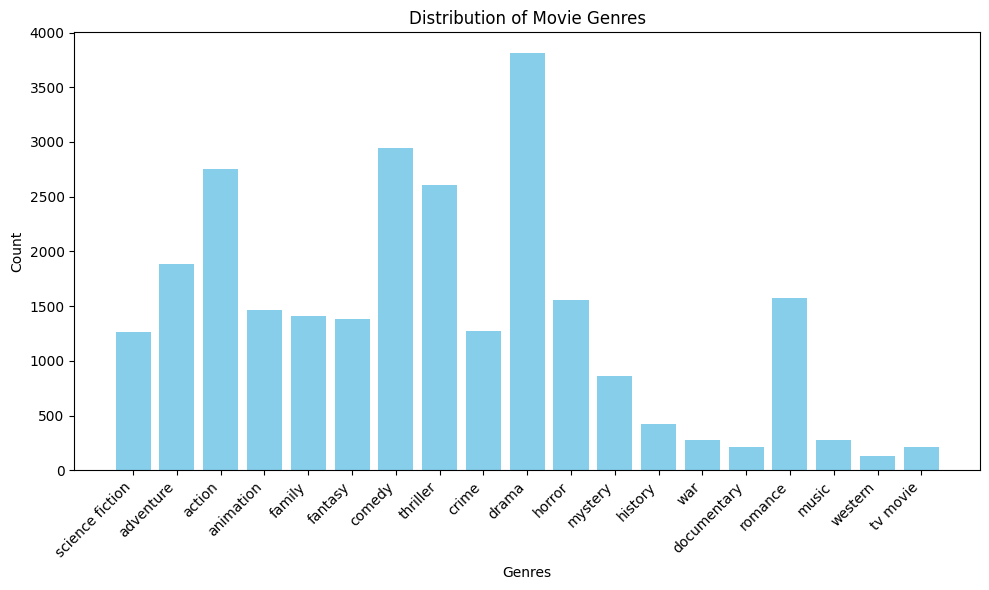

In [14]:
# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Extract unique genre values
unique_genres = list(genre_counts.keys())

# Extract counts for each genre
genre_values = list(genre_counts.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_genres, genre_values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar plot above illustrates the distribution of movie genres in the dataset. The most frequent genre is "Drama," followed by "Comedy," and "Action." Other genres such as "Science Fiction," "Thriller," and "Adventure" also have a significant presence. However, some genres like "Music," "Western," and "TV Movie" have relatively fewer instances.

### 1.8.Data Cleaning and Standardization

### 1.8.1.Removing HTML tags if the data is scraped from the web

In [15]:
# Function to remove HTML tags using BeautifulSoup
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the function to the DESCRIPTION column
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_html_tags)


<ipython-input-15-4c1e36aa8d63>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


### 1.8.2.Removing special characters

In [16]:
def remove_special_characters(text):
    # This pattern will keep only letters, numbers, and spaces
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_special_characters)

### 1.8.3.Removing emojis and  non-standard symbols

In [17]:
# Function to remove emojis and other non-standard symbols
def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['DESCRIPTION'] = data['DESCRIPTION'].apply(remove_emojis_and_symbols)


### 1.8.4.Converting to Lowercase:

In [18]:
 # Convert DESCRIPTION column to lowercase
data['DESCRIPTION'] = data['DESCRIPTION'].str.lower()


# Print the first few rows to verify the changes
data[['DESCRIPTION']].head()

data.head()

,title,GENRE,DESCRIPTION
0,Avatar: The Way of Water,"science fiction, adventure, action",set more than a decade after the events of the...
1,The Super Mario Bros. Movie,"animation, adventure, family, fantasy, comedy",while working underground to fix a water main ...
2,Mummies,"animation, comedy, family, adventure, fantasy",through a series of unfortunate events three m...
3,Supercell,action,goodhearted teenager william always lived in h...
4,Cocaine Bear,"thriller, comedy, crime",inspired by a true story an oddball group of c...


### 1.8.6.Remove Extra Whitespace

In [19]:
# Assuming 'df' is your DataFrame
string_columns = df.select_dtypes(include=['object']).columns

# Removing extra whitespace
for col in string_columns:
    df[col] = df[col].str.strip()  # Strip leading and trailing whitespace
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)  # Replace multiple internal spaces

# Verify the changes
df.head()


,title,date_x,score,GENRE,DESCRIPTION,crew,og_title,status,lang,budget,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


### 1.8.7.Checking Missing Values

In [20]:
# Handle missing values
data.dropna(inplace=True)

# Check for missing values
assert not data.isnull().values.any(), "Missing values are present in the data."

# Print success message
print("Missing values handled successfully.")

Missing values handled successfully.


### 1.8.8.Non-informative words

In [21]:
# Download the set of stop words the first time
nltk.download('stopwords')

# Load the stop words
non_informative_words = set(stopwords.words('english'))

# Define the function to remove non-informative words
def remove_non_informative(text):
    # Split the text into words and remove non-informative words
    return ' '.join(word for word in text.split() if word.lower() not in non_informative_words)

# Apply the function to remove non-informative words from the 'DESCRIPTION' column
df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_non_informative)

# Optionally, check again for non-informative words in 'CLEAN_DESCRIPTION'
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].apply(
    lambda x: any(word.lower() in non_informative_words for word in x.split())
)

# Display the DataFrame to verify the removal and create a summary
display_df = df[['CLEAN_DESCRIPTION', 'contains_non_informative']]
summary = {'Non-informative Words Removed': not df['contains_non_informative'].any()}

display_df.head()  # Display first few rows to check
print(summary)  # Display summary of checks


{'Non-informative Words Removed': True}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Download the set of stop words the first time
nltk.download('stopwords')

# Load the stop words
non_informative_words = set(stopwords.words('english'))

# Assuming you have loaded your DataFrame already; if not, load it here
# df = pd.read_csv('path_to_your_file.csv')

# Define the function to remove non-informative words
def remove_non_informative(text):
    # Split the text into words and remove non-informative words
    return ' '.join(word for word in text.split() if word.lower() not in non_informative_words)

# Apply the function to remove non-informative words from the 'DESCRIPTION' column
df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_non_informative)

# Optionally, check again for non-informative words in 'CLEAN_DESCRIPTION'
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].apply(
    lambda x: any(word.lower() in non_informative_words for word in x.split())
)

# Display the DataFrame to verify the removal and create a summary
display_df = df[['CLEAN_DESCRIPTION', 'contains_non_informative']]
summary = {'Non-informative Words Removed': not df['contains_non_informative'].any()}

display_df.head() # Display first few rows to check
print(summary)  # Display summary of checks


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'Non-informative Words Removed': True}


### 1.8.8.1.checking cleanliness

In [23]:
# Define functions for cleaning
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_emojis_and_symbols(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', text)

# Apply cleaning functions
df['DESCRIPTION'] = df['DESCRIPTION'].apply(remove_html_tags).apply(remove_special_characters).apply(remove_emojis_and_symbols)
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Download and prepare stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove non-informative words
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word.lower() not in stop_words)

df['CLEAN_DESCRIPTION'] = df['DESCRIPTION'].apply(remove_stop_words)

# Filling missing values appropriately
#df.fillna({'year': 0, 'rating': df['rating'].mean(), 'votes': 0, 'gross(in $)': 0}, inplace=True)
#df.fillna('unknown', inplace=True)

# Apply scaling
scaler = MinMaxScaler()
#df['rating'] = scaler.fit_transform(df[['rating']])
standard_scaler = StandardScaler()
#df[['votes', 'gross(in $)']] = standard_scaler.fit_transform(df[['votes', 'gross(in $)']])

# Removing extra whitespace
df = df.applymap(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

# Verification steps
df['contains_html'] = df['DESCRIPTION'].apply(lambda x: bool(BeautifulSoup(x, "html.parser").find()))
df['contains_special'] = df['DESCRIPTION'].str.contains(r'[^a-zA-Z0-9\s]')
df['contains_stop'] = df['CLEAN_DESCRIPTION'].apply(lambda x: any(word in stop_words for word in x.split()))
df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')

summary = {
    'HTML Tags Removed': not df['contains_html'].any(),
    'Special Characters Removed': not df['contains_special'].any(),
    'Non-informative Words Removed': not df['contains_non_informative'].any(),
    'Stop Words Removed': not df['contains_stop'].any()
}

print(summary)


<ipython-input-23-8cb835bcbb5e>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-23-8cb835bcbb5e>:55: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['contains_non_informative'] = df['CLEAN_DESCRIPTION'].str.contains(r'\b(' + '|'.join(stop_words) + r')\b')


{'HTML Tags Removed': True, 'Special Characters Removed': True, 'Non-informative Words Removed': True, 'Stop Words Removed': True}


### 1.8.9.Tokenization, Stop Words Removal, and Handling Negations:

In [24]:
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Negation handling function
def handle_negation(tokens):
    negation_terms = ['not', 'no', 'never', "n't", 'nothing', 'nowhere', 'neither', 'nor']
    transformed_tokens = []
    negation_active = False

    for token in tokens:
        if token in negation_terms:
            negation_active = True
        elif negation_active:
            transformed_tokens.append(f"not_{token}")
            negation_active = False
        else:
            transformed_tokens.append(token)

    return transformed_tokens

# Apply tokenization
df['tokens'] = df['CLEAN_DESCRIPTION'].apply(tokenize_text)

# Apply negation handling
df['handled_negations'] = df['tokens'].apply(handle_negation)

# Display the DataFrame to verify negation handling
print(df[['tokens', 'handled_negations']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              tokens  \
0  [dominating, boxing, world, adonis, creed, thr...   
1  [set, decade, events, first, film, learn, stor...   
2  [working, underground, fix, water, main, brook...   
3  [series, unfortunate, events, three, mummies, ...   
4  [goodhearted, teenager, william, always, lived...   

                                   handled_negations  
0  [dominating, boxing, world, adonis, creed, thr...  
1  [set, decade, events, first, film, learn, stor...  
2  [working, underground, fix, water, main, brook...  
3  [series, unfortunate, events, three, mummies, ...  
4  [goodhearted, teenager, william, always, lived...  


### 1.8.10.Lemmatization

In [ ]:
# Load spaCy English model with only the tokenizer and tagger since that's enough for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Define the lemmatization function with nlp model as a parameter
def lemmatize_text(text, nlp):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Function to process in batches
def process_text_in_batches(dataframe, column_name):
    chunk_size = 500  # Adjust the chunk size based on your system's capability
    num_chunks = len(dataframe) // chunk_size + 1

    lemmatized_texts = []
    for i in tqdm(range(num_chunks)):
        batch = dataframe[column_name][i*chunk_size:(i+1)*chunk_size]
        lemmatized_batch = batch.apply(lambda text: lemmatize_text(text, nlp))
        lemmatized_texts.extend(lemmatized_batch)

    return lemmatized_texts

# Applying batch processing
df['lemmatized_description'] = process_text_in_batches(df, 'CLEAN_DESCRIPTION')

100%|██████████| 21/21 [02:12<00:00,  6.33s/it]


### 1.8.10.1.Loading Lemmatization's file

In [ ]:
df.to_csv('lemmatizedf_data.csv', index=False)

In [11]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/lemmatizedf_data.csv'
df = pd.read_csv(file_path, sep=',', engine='python')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Exploratory Data Analysis (EDA)

# II.Modeling

### 1.1.Creating Document Vectors Using GloVe Embeddings

In [66]:
# Ensure the GloVe model is loaded (consider handling this with try-except to catch loading issues)
glove_model = api.load("glove-wiki-gigaword-50")

# Define the function to create document vectors
def document_vector(tokens, model):
    filtered_tokens = [token for token in tokens if token in model.key_to_index]
    if not filtered_tokens:
        return np.zeros(model.vector_size)
    return np.mean(model[filtered_tokens], axis=0)

# Apply the document vector function to a tokens column that should exist
if 'tokens' in df.columns:
    df['vector'] = df['tokens'].apply(lambda tokens: document_vector(tokens, glove_model))
else:
    print("Error: 'tokens' column does not exist.")

# Check that the 'vector' column has been created successfully
if 'vector' not in df.columns:
    print("Vector column creation failed.")
else:
    print("Vector column created successfully.")


Vector column created successfully.


### 1.2.Aggregating and Reducing Genres for Analysis

In [67]:
# Define a comprehensive mapping of genres to aggregated genres
genre_aggregation = {
    'horror': 'Horror',
    'action': 'Action',
    'thriller': 'Thriller',
    'drama': 'Drama',
    'romance': 'Romance',
    'crime': 'Crime',
    'comedy': 'Comedy',
    'adventure': 'Adventure',
    'animation': 'Animation',
    'sci-fi': 'Sci-Fi',
    'fantasy': 'Fantasy',
    'documentary': 'Documentary',
    'family': 'Family',
    'mystery': 'Mystery',
    'biography': 'Biography',
    'history': 'History',
    'war': 'War',
    'music': 'Music',
    'musical': 'Musical',
    'sport': 'Sport',
    'western': 'Western',
    'film-noir': 'Film-Noir',
    'news': 'News',
    'reality-tv': 'Reality-TV',
    'short': 'Short',
    'talk-show': 'Talk-Show',
    'game-show': 'Game-Show',
    'action, crime, drama': 'Crime Drama',
    'drama, romance': 'Romance',
}

# Map genres to aggregated genres
df['aggregated_genre'] = df['GENRE'].replace(regex=genre_aggregation)

# Now, we reduce the genres to top N and 'other'
top_n = 10
top_genres = df['aggregated_genre'].value_counts().nlargest(top_n).index
df['final_genre'] = df['aggregated_genre'].apply(lambda x: x if x in top_genres else 'Other')

# Check the new distribution
print(df['final_genre'].value_counts(normalize=True))


final_genre
Other               0.767102
Drama               0.055770
Comedy              0.038120
Drama, Romance      0.026423
Horror              0.024230
Comedy, Romance     0.019217
Horror, Thriller    0.018172
Documentary         0.014935
Action, Thriller    0.012219
Comedy, Drama       0.011906
Romance             0.011906
Name: proportion, dtype: float64


### 1.3.Applying PCA and Training a Random Forest Classifier on Reduced Vectors

In [68]:
# Perform PCA on vectors
pca = PCA(n_components=50)
reduced_vectors = pca.fit_transform(list(df['vector']))

# Encode the target variable
label_encoder = LabelEncoder()
df['encoded_final_genre'] = label_encoder.fit_transform(df['final_genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, df['encoded_final_genre'], test_size=0.2, random_state=42)

# Train a simple Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.7676240208877284
Classification Report:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.00      0.00      0.00        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.00      0.00      0.00        41
     Documentary       0.00      0.00      0.00        29
           Drama       0.00      0.00      0.00       112
  Drama, Romance       0.00      0.00      0.00        56
          Horror       0.00      0.00      0.00        51
Horror, Thriller       0.00      0.00      0.00        36
           Other       0.77      1.00      0.87      1470
         Romance       0.00      0.00      0.00        20

        accuracy                           0.77      1915
       macro avg       0.07      0.09      0.08      1915
    weighted avg       0.59      0.77      0.67      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.3.1.incorporating SMOTE for handling class imbalance:





In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Resample the training data to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Accuracy: 0.7154046997389034
Classification Report:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.08      0.06      0.07        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.14      0.02      0.04        41
     Documentary       0.17      0.03      0.06        29
           Drama       0.06      0.03      0.04       112
  Drama, Romance       0.00      0.00      0.00        56
          Horror       0.00      0.00      0.00        51
Horror, Thriller       0.00      0.00      0.00        36
           Other       0.78      0.92      0.84      1470
         Romance       0.24      0.20      0.22        20

        accuracy                           0.72      1915
       macro avg       0.13      0.12      0.11      1915
    weighted avg       0.61      0.72      0.66      1915



### 1.4.BERT Embeddings and RandomForest:

By using BERT embeddings, it can capture more semantic information from the descriptions, which might help the classifier to better distinguish between different genres.

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to encode text data into embeddings in batches
def encode_texts(texts, batch_size=8):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Encoding Batches"):
        batch_texts = texts[i:i + batch_size]
        encoded_input = tokenizer(batch_texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
        outputs = bert_model(encoded_input['input_ids'])
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Use [CLS] token representation
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Extract and encode the lemmatized descriptions into BERT embeddings
descriptions = df['lemmatized_description'].tolist()
bert_embeddings = encode_texts(descriptions, batch_size=8)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['final_genre'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, y_encoded, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Encoding Batches:  38%|███▊      | 454/1197 [10:29<19:33,  1.58s/it]

### 1.4.1.Implementation with SMOTE and Random Forest:

In [ ]:
# Load pre-trained DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to encode text data into embeddings in batches
def encode_texts(texts, batch_size=8):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Encoding Batches"):
        batch_texts = texts[i:i + batch_size]
        encoded_input = tokenizer(batch_texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
        outputs = bert_model(encoded_input['input_ids'])
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Use [CLS] token representation
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Extract and encode the lemmatized descriptions into BERT embeddings
descriptions = df['lemmatized_description'].tolist()
bert_embeddings = encode_texts(descriptions, batch_size=8)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['final_genre'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, y_encoded, test_size=0.2, random_state=42)

# Resample the training data to address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


### 1.5.Experimenting with different models

experimenting with different models and combining multiple models using ensemble methods. We will use XGBoost, Gradient Boosting, and an LSTM model, and then combine them using a Voting Classifier.

### 1.5.1.Data Preparation

In [28]:
# Assuming 'df' is already loaded and preprocessed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['final_genre'])

# Perform PCA on vectors if not done already
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
reduced_vectors = pca.fit_transform(list(df['vector']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_vectors, y_encoded, test_size=0.2, random_state=42)


### 1.5.2.XGBoost Model

In [29]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Model Accuracy: 0.7676240208877284
Classification Report for XGBoost:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.00      0.00      0.00        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.00      0.00      0.00        41
     Documentary       0.00      0.00      0.00        29
           Drama       0.00      0.00      0.00       112
  Drama, Romance       0.00      0.00      0.00        56
          Horror       0.00      0.00      0.00        51
Horror, Thriller       0.00      0.00      0.00        36
           Other       0.77      1.00      0.87      1470
         Romance       0.33      0.05      0.09        20

        accuracy                           0.77      1915
       macro avg       0.10      0.10      0.09      1915
    weighted avg       0.59      0.77      0.67      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.5.3.Gradient Boosting Model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Model Accuracy:", accuracy_gb)
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))


Gradient Boosting Model Accuracy: 0.7514360313315926
Classification Report for Gradient Boosting:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.00      0.00      0.00        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.11      0.02      0.04        41
     Documentary       0.14      0.03      0.06        29
           Drama       0.00      0.00      0.00       112
  Drama, Romance       0.25      0.02      0.03        56
          Horror       0.00      0.00      0.00        51
Horror, Thriller       0.00      0.00      0.00        36
           Other       0.77      0.97      0.86      1470
         Romance       0.25      0.15      0.19        20

        accuracy                           0.75      1915
       macro avg       0.14      0.11      0.11      1915
    weighted avg       0.61      0.75      0.67      1915



### 1.5.4.LSTM Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the LSTM model
max_sequence_length = 100
embedding_dim = 50

lstm_model = Sequential([
    Embedding(input_dim=len(glove_model.key_to_index)+1, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, return_sequences=False),
    Dense(len(np.unique(y_train)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare data for LSTM
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['lemmatized_description'])
X_sequences = tokenizer.texts_to_sequences(df['lemmatized_description'])
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post')

# Split data again for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_split=0.1)

# Predict and evaluate
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print("LSTM Model Accuracy:", accuracy_lstm)
print("Classification Report for LSTM:")
print(classification_report(y_test_lstm, y_pred_lstm, target_names=label_encoder.classes_))


Epoch 1/5
216/216 [==============================] - 139s 636ms/step - loss: 1.0965 - accuracy: 0.7649 - val_loss: 1.0702 - val_accuracy: 0.7559
Epoch 2/5
216/216 [==============================] - 150s 693ms/step - loss: 1.0513 - accuracy: 0.7682 - val_loss: 1.0700 - val_accuracy: 0.7559
Epoch 3/5
216/216 [==============================] - 141s 653ms/step - loss: 1.0507 - accuracy: 0.7682 - val_loss: 1.0710 - val_accuracy: 0.7559
Epoch 4/5
216/216 [==============================] - 138s 640ms/step - loss: 1.0508 - accuracy: 0.7682 - val_loss: 1.0669 - val_accuracy: 0.7559
Epoch 5/5
60/60 [==============================] - 3s 38ms/step
LSTM Model Accuracy: 0.7676240208877284
Classification Report for LSTM:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.00      0.00      0.00        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.5.5.Ensemble Method

In [76]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('gb', gb_model),
], voting='soft')

# Train the ensemble model on the resampled data
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = ensemble_model.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)
print("Classification Report for Ensemble:")
print(classification_report(y_test, y_pred_ensemble, target_names=label_encoder.classes_))


Ensemble Model Accuracy: 0.7618798955613577
Classification Report for Ensemble:
                  precision    recall  f1-score   support

Action, Thriller       0.00      0.00      0.00        25
          Comedy       0.00      0.00      0.00        54
   Comedy, Drama       0.00      0.00      0.00        21
 Comedy, Romance       0.00      0.00      0.00        41
     Documentary       0.00      0.00      0.00        29
           Drama       0.00      0.00      0.00       112
  Drama, Romance       0.00      0.00      0.00        56
          Horror       0.00      0.00      0.00        51
Horror, Thriller       0.00      0.00      0.00        36
           Other       0.77      0.99      0.87      1470
         Romance       0.33      0.15      0.21        20

        accuracy                           0.76      1915
       macro avg       0.10      0.10      0.10      1915
    weighted avg       0.59      0.76      0.67      1915



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
